In [210]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score,silhouette_score,silhouette_samples
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

import os
import glob
import re

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [211]:
def get_box_plot_data(labels, bp):
    rows_list = []

    for i in range(len(labels)):
        dict1 = {}
        dict1['Cluster'] = labels[i]
        dict1['Lower Whisker'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['Lower Quartile'] = bp['boxes'][i].get_ydata()[1]
        dict1['Median'] = bp['medians'][i].get_ydata()[1]
        dict1['Upper Quartile'] = bp['boxes'][i].get_ydata()[2]
        dict1['Upper Whisker'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict1)

    return pd.DataFrame(rows_list)

Cluster = [2,3,4,5,6,7,8,9,10]


In [212]:
df = pd.read_csv("../input/datapoint/si.csv", sep=",", header=None)
ticks = ["Cluster 2","Cluster 3","Cluster 4","Cluster 5","Cluster 6","Cluster 7","Cluster 8","Cluster 9","Cluster 10"]
ticks2 = [2,3,4,5,6,7,8,9,10]
df.head()

,0,1,2,3,4,5,6,7,8
0,0.867363,0.648306,0.630298,0.569625,0.561359,0.569618,0.460603,0.445538,0.443743
1,0.761057,0.655987,0.654527,0.666691,0.597422,0.503476,0.493547,0.461685,0.460034
2,0.794573,0.718813,0.691246,0.664664,0.659799,0.579786,0.576556,0.577458,0.573172
3,0.749200,0.732992,0.672504,0.657378,0.596012,0.599299,0.599539,0.509302,0.526087
4,0.793888,0.767601,0.677061,0.702643,0.580208,0.580199,0.581031,0.582425,0.545839


In [213]:
X = df.values
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

,Cluster,Lower Whisker,Lower Quartile,Median,Upper Quartile,Upper Whisker
0,2,-2.695987,-0.835409,0.332753,0.845595,1.199365
1,3,-1.913590,-0.784969,-0.068475,0.800187,1.812884
2,4,-1.740692,-0.858886,-0.141108,0.758794,2.173240
3,5,-1.803121,-0.781517,-0.052195,0.642457,2.581226
4,6,-1.679150,-0.793600,-0.189672,0.789981,2.723291
5,7,-1.723307,-0.729578,-0.186934,0.615067,2.561464
6,8,-1.744809,-0.823057,-0.072943,0.603235,2.446733
7,9,-2.406012,-0.781445,-0.092285,0.696383,2.538152
8,10,-2.113010,-0.615606,0.047145,0.682770,2.571303


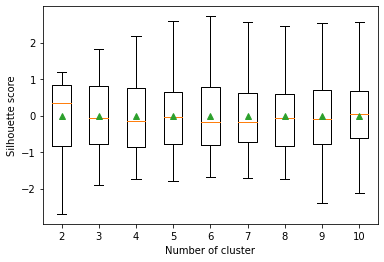

In [214]:
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette score")
K_values = [2,3,4,5,6,7,8,9,10]
bp = plt.boxplot(X, showmeans=True , positions = K_values)
get_box_plot_data(Cluster, bp)

,Cluster,Lower Whisker,Lower Quartile,Median,Upper Quartile,Upper Whisker
0,2,0.534391,0.753024,0.890293,0.950556,0.992127
1,3,0.519563,0.661631,0.751821,0.861166,0.988642
2,4,0.472306,0.576247,0.660853,0.766927,0.933651
3,5,0.454132,0.561021,0.637330,0.710010,0.912861
4,6,0.445117,0.532666,0.592372,0.689225,0.880360
5,7,0.423249,0.517149,0.568425,0.644209,0.828129
6,8,0.410524,0.486173,0.547736,0.603230,0.754528
7,9,0.320046,0.462711,0.523231,0.592490,0.754229
8,10,0.313098,0.452430,0.514099,0.573243,0.748969


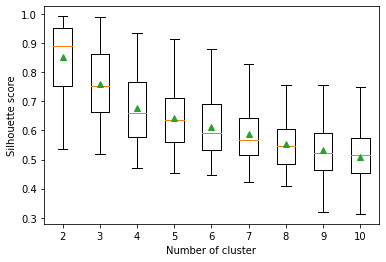

In [215]:
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette score")
K_values = [2,3,4,5,6,7,8,9,10]
bp1 = plt.boxplot(df, showmeans=True, positions = K_values)
get_box_plot_data(Cluster, bp1)

In [216]:
df2 = pd.read_csv('../input/datapoint/db.csv', sep=",", header=None)
df2.head()

,0,1,2,3,4,5,6,7,8
0,0.273244,0.495048,0.475560,0.545258,0.427416,0.356691,0.432171,0.543836,0.542745
1,0.737936,0.492551,0.455122,0.404177,0.491168,0.562679,0.666622,0.712995,0.597021
2,0.818409,0.608284,0.739199,0.599384,0.507907,0.544637,0.516492,0.486883,0.524193
3,0.786184,0.614763,0.697473,0.624954,0.669884,0.549070,0.512962,0.587041,0.560025
4,0.742708,0.581889,0.758088,0.805817,0.797404,0.668743,0.596973,0.604126,0.589351


In [217]:
# normalize data
Y = df2.values
sc = StandardScaler()
sc.fit(Y)
Y = sc.transform(Y)

,Cluster,Lower Whisker,Lower Quartile,Median,Upper Quartile,Upper Whisker
0,2,-1.616499,-0.797497,0.121235,0.881321,2.027266
1,3,-2.280800,-0.462330,0.074214,0.757866,1.589316
2,4,-2.110166,-0.640882,-0.100186,0.552127,2.253123
3,5,-1.964498,-0.791569,-0.051114,0.728703,2.411401
4,6,-1.510941,-0.713037,-0.101923,0.507439,2.040419
5,7,-1.977393,-0.698817,0.046318,0.723654,2.333817
6,8,-1.901157,-0.592447,-0.047387,0.573095,1.717961
7,9,-2.018727,-0.646474,-0.034506,0.718032,2.306382
8,10,-2.058226,-0.718706,0.056272,0.794405,2.313400


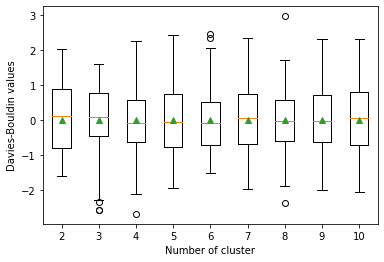

In [218]:
plt.xlabel("Number of cluster")
plt.ylabel("Davies-Bouldin values")
K_values = [2,3,4,5,6,7,8,9,10]
bp2= plt.boxplot(Y, showmeans=True, positions = K_values)
get_box_plot_data(Cluster, bp2)

,Cluster,Lower Whisker,Lower Quartile,Median,Upper Quartile,Upper Whisker
0,2,0.011971,0.225441,0.464905,0.663019,0.961705
1,3,0.065487,0.386678,0.481446,0.602198,0.749055
2,4,0.217672,0.420197,0.494726,0.584640,0.819104
3,5,0.268990,0.415418,0.507856,0.605208,0.815276
4,6,0.325695,0.420354,0.492853,0.565145,0.747009
5,7,0.232515,0.394380,0.488713,0.574463,0.778307
6,8,0.241484,0.412352,0.483516,0.564528,0.714004
7,9,0.218449,0.401446,0.483055,0.583409,0.795224
8,10,0.234479,0.401486,0.498108,0.590137,0.779520


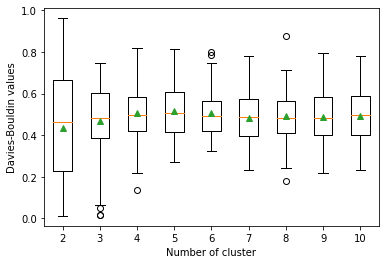

In [219]:
plt.xlabel("Number of cluster")
plt.ylabel("Davies-Bouldin values")
K_values = [2,3,4,5,6,7,8,9,10]
bp3= plt.boxplot(df2, showmeans=True , positions = K_values)
get_box_plot_data(Cluster, bp3)